In [31]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [58]:
N = 30
P = 50

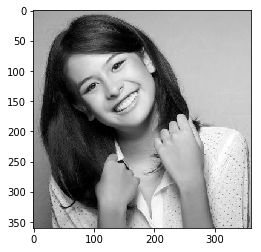

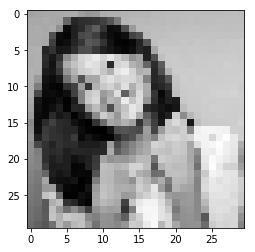

In [59]:
img = cv2.imread('./maudy.png', 0)
imshow(img)
img = cv2.resize(img, (N,N))
imvec = np.reshape(np.array(img), (N*N,1))

def imshow(imgdata):
    plt.imshow(imgdata, cmap = 'gray')
    plt.show()

imshow(img)

In [60]:
matN = np.ones((P,P))
matM = np.ones((P,P))
for i in range(P):
    matN[i,:] = i
    matM[:,i] = i
matN = matN.reshape((P*P,1))
matN = np.repeat(matN, N*N, axis=1)
matM = matM.reshape((P*P,1))
matM = np.repeat(matM, N*N, axis=1)

matI = np.ones((N,N))
matK = np.ones((N,N))
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((1,N*N))
matI = np.repeat(matI, P*P, axis=0)
matK = matK.reshape((1,N*N))
matK = np.repeat(matK, P*P, axis=0)

matY = (2 * matI + 1 - N) / N
matX = (2 * matK + 1 - N) / N
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)
matW = 4 / (np.pi * N * N) * np.exp(-2 * np.pi * matN * matR * matR * 1j - matM * matT * 1j)

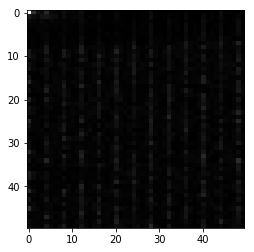

In [61]:
transformed = np.matmul(matW, imvec)
transformed_abs = np.abs(transformed)
transformed_abs_img = np.reshape(transformed_abs, (P, P))
imshow(transformed_abs_img)

In [62]:
matN = np.ones((P,P))
matM = np.ones((P,P))
for i in range(P):
    matN[i,:] = i
    matM[:,i] = i
matN = matN.reshape((1,P*P))
matN = np.repeat(matN, N*N, axis=0)
matM = matM.reshape((1,P*P))
matM = np.repeat(matM, N*N, axis=0)

matI = np.ones((N,N))
matK = np.ones((N,N))
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((N*N,1))
matI = np.repeat(matI, P*P, axis=1)
matK = matK.reshape((N*N,1))
matK = np.repeat(matK, P*P, axis=1)

matY = (2 * matI + 1 - N) / N
matX = (2 * matK + 1 - N) / N
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)
matV = np.exp(2 * np.pi * matN * matR * matR * 1j + matM * matT * 1j)

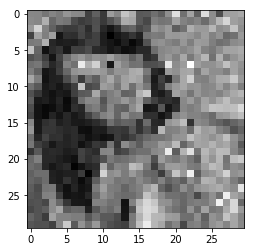

In [63]:
inversed = np.matmul(matV, transformed)
inversed_abs = np.abs(inversed)
inversed_abs_img = np.reshape(inversed_abs, (N,N))
imshow(inversed_abs_img)

In [64]:
matVW = np.matmul(matV, matW)
matVW = np.abs(matVW)
np.floor(matVW)

array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 0., 3., 0.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [67]:
np.max(inversed_abs_img)

1513.113132185877